In [1]:
import Windfield_Env
import numpy as np

In [2]:
a=Windfield_Env.WindField(size=7)

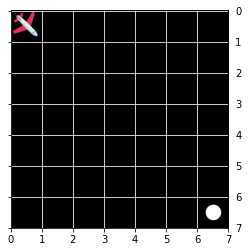

In [3]:
a.render()

In [4]:
WindField=a.generate_uniform_windfield()

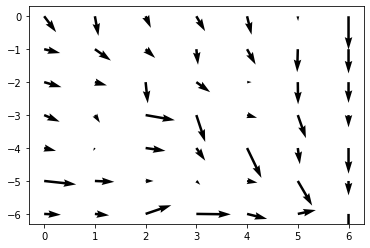

In [5]:
a.plot_windfield(WindField)

In [83]:
np.array(a.transition_prob(state=(0,0,3),action="S",wind_field=WindField))[:,1]

C:\Users\Sushi\AppData\Local\Temp\ipykernel_12696\534989722.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(a.transition_prob(state=(0,0,3),action="S",wind_field=WindField))[:,1]


array([0.0006667376563887421, 0.013115752292080344, 0.10068307491505527,
       0.3050697404400642, 0.3677118612585163, 0.17656798819921526,
       0.033592312388916294, 0.002506122370888313], dtype=object)

In [53]:
S = []
for i in range(0, 7):
    for j in range(0,7):
        S.append([i,j])
S = np.array(S)
S.shape

(49, 2)

In [54]:
S

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 0],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [6, 0],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5],
       [6, 6]])

In [46]:
V_s = np.hstack((np.random.random(48), np.zeros(1)))

In [58]:
V = V_s
V = V.reshape((7,7))

In [89]:
theta = 0.01
delta = 100000
actions = list(a.change_coordinates.keys())
while delta >= theta:
    delta = 0
    for s in S:
        v = V[s[0], s[1]]
        V_max = -1000
        for act in actions:
            probs = np.array(a.transition_prob(state = np.hstack((s, np.array([3]))), action = act, wind_field=WindField))[:,1]
            next_s = np.array(a.transition_prob(state = np.hstack((s, np.array([3]))), action = act, wind_field=WindField))[:,0]  
            reward = np.array([a.reward(state = sd, windfield=WindField) for sd in next_s])
            temp = (probs*reward).sum()
            V_max = np.array([temp, V_max]).max()
        V[s[0],s[1]] = V_max
        delta = np.array([delta, abs(v - V[s[0],s[1]])])

C:\Users\Sushi\AppData\Local\Temp\ipykernel_12696\1157966258.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  probs = np.array(a.transition_prob(state = np.hstack((s, np.array([3]))), action = act, wind_field=WindField))[:,1]
C:\Users\Sushi\AppData\Local\Temp\ipykernel_12696\1157966258.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  next_s = np.array(a.transition_prob(state = np.hstack((s, np.array([3]))), action = act, wind_field=WindField))[:,0]
C:\Users\Sushi\AppData\Local\Temp\ipykernel_12696\1157966258.py:16: VisibleDeprecationWarning: 

IndexError: index 7 is out of bounds for axis 1 with size 7

In [44]:
S.shape

(7, 7, 2)

In [29]:
[1,1].append(1)

In [34]:
V[0][0]

0.8390790719854698

In [86]:
np.array([3,1])*np.array([2,2])

array([6, 2])